### Libraries

In [2]:
# For reading, and transforming data
import pandas as pd 

# For creating network graphs 
import networkx as nx

# To use shortest path and clique-finding algorithms 
from networkx.algorithms import approximation

# For basic mathematical calculations
import math 


# For visualising our networks
import matplotlib.pyplot as plt

# Specifically, for interactive visualisations
import chart_studio
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
from plotly.offline import plot as offpy

### Read the data and explore graph properties

In [3]:
enron = pd.read_csv('enron_emails.csv')

In [4]:
enron.head()

,from,to
0,greg.whalley,k..allen
1,louise.kitchen,k..allen
2,louise.kitchen,k..allen
3,errol.mclaughlin,john.arnold
4,mike.grigsby,john.arnold


In [5]:
type(enron)

pandas.core.frame.DataFrame

In [6]:
enron.dtypes

from    object
to      object
dtype: object

In [7]:
# Want to convert from datafram to a networkx graph object
g = nx.from_pandas_edgelist(enron, source = 'from', target = 'to')

g

In [11]:
# Is the network directeD? Y or N
nx.is_directed(g)

False

By default it has shows as non-directed, but we know it is directed so we need to tell it 

In [12]:
# Want to convert from datafram to a networkx graph object
# SPecifiying direction by using the create_using parameter
g = nx.from_pandas_edgelist(enron, source = 'from', target = 'to', create_using = nx.DiGraph() )

g

In [13]:
nx.is_directed(g)

True

In [22]:
# How many nodes?
list(g.nodes())

['greg.whalley',
 'k..allen',
 'louise.kitchen',
 'errol.mclaughlin',
 'john.arnold',
 'mike.grigsby',
 'john.griffith',
 'dutch.quigley',
 's..shively',
 'richard.shapiro',
 'harry.arora',
 'sally.beck',
 'matthew.lenhart',
 'eric.bass',
 'a..martin',
 'm..love',
 'monique.sanchez',
 'charles.weldon',
 'jeff.king',
 'don.baughman',
 'w..delainey',
 'w..white',
 'rod.hayslett',
 'rick.buy',
 'm..presto',
 'robert.benson',
 'dana.davis',
 'joe.quenet',
 'susan.scott',
 'michelle.lokay',
 'lynn.blair',
 'lindy.donoho',
 'shelley.corman',
 'kimberly.watson',
 'bill.rapp',
 'scott.neal',
 'f..brawner',
 'jim.schwieger',
 'vladi.pimenov',
 'andrea.ring',
 'l..mims',
 'j.kaminski',
 'j..kean',
 'a..shankman',
 'stanley.horton',
 'kenneth.lay',
 'f..campbell',
 'joe.stepenovitch',
 'd..thomas',
 'mike.carson',
 'eric.saibi',
 'j..sturm',
 'michelle.cash',
 'teb.lokey',
 'tracy.geaccone',
 'kevin.hyatt',
 'darrell.schoolcraft',
 'd..steffes',
 'cara.semperger',
 'sean.crandall',
 'cooper.riche

In [23]:
g.number_of_edges()

636

In [24]:
g.number_of_nodes()

131

In [25]:
# Direction agnostic
list(g.degree())

[('greg.whalley', 18),
 ('k..allen', 10),
 ('louise.kitchen', 31),
 ('errol.mclaughlin', 11),
 ('john.arnold', 14),
 ('mike.grigsby', 28),
 ('john.griffith', 8),
 ('dutch.quigley', 10),
 ('s..shively', 16),
 ('richard.shapiro', 10),
 ('harry.arora', 5),
 ('sally.beck', 23),
 ('matthew.lenhart', 9),
 ('eric.bass', 11),
 ('a..martin', 20),
 ('m..love', 12),
 ('monique.sanchez', 14),
 ('charles.weldon', 6),
 ('jeff.king', 3),
 ('don.baughman', 6),
 ('w..delainey', 6),
 ('w..white', 14),
 ('rod.hayslett', 17),
 ('rick.buy', 14),
 ('m..presto', 13),
 ('robert.benson', 6),
 ('dana.davis', 3),
 ('joe.quenet', 1),
 ('susan.scott', 13),
 ('michelle.lokay', 16),
 ('lynn.blair', 13),
 ('lindy.donoho', 22),
 ('shelley.corman', 18),
 ('kimberly.watson', 21),
 ('bill.rapp', 14),
 ('scott.neal', 20),
 ('f..brawner', 8),
 ('jim.schwieger', 7),
 ('vladi.pimenov', 9),
 ('andrea.ring', 2),
 ('l..mims', 7),
 ('j.kaminski', 4),
 ('j..kean', 11),
 ('a..shankman', 6),
 ('stanley.horton', 11),
 ('kenneth.lay'

In [29]:
# Focus on only emails rec'd
list(g.in_degree())

[('greg.whalley', 16),
 ('k..allen', 2),
 ('louise.kitchen', 2),
 ('errol.mclaughlin', 5),
 ('john.arnold', 6),
 ('mike.grigsby', 6),
 ('john.griffith', 0),
 ('dutch.quigley', 6),
 ('s..shively', 8),
 ('richard.shapiro', 2),
 ('harry.arora', 3),
 ('sally.beck', 5),
 ('matthew.lenhart', 1),
 ('eric.bass', 5),
 ('a..martin', 16),
 ('m..love', 3),
 ('monique.sanchez', 3),
 ('charles.weldon', 2),
 ('jeff.king', 1),
 ('don.baughman', 1),
 ('w..delainey', 1),
 ('w..white', 6),
 ('rod.hayslett', 7),
 ('rick.buy', 10),
 ('m..presto', 1),
 ('robert.benson', 6),
 ('dana.davis', 0),
 ('joe.quenet', 0),
 ('susan.scott', 8),
 ('michelle.lokay', 5),
 ('lynn.blair', 5),
 ('lindy.donoho', 14),
 ('shelley.corman', 11),
 ('kimberly.watson', 11),
 ('bill.rapp', 8),
 ('scott.neal', 10),
 ('f..brawner', 6),
 ('jim.schwieger', 0),
 ('vladi.pimenov', 7),
 ('andrea.ring', 1),
 ('l..mims', 4),
 ('j.kaminski', 1),
 ('j..kean', 3),
 ('a..shankman', 0),
 ('stanley.horton', 2),
 ('kenneth.lay', 14),
 ('f..campbell

In [33]:
#u=source, v-target
g.number_of_edges('greg.whalley','k..allen')

1

In [36]:
# see who greg sent emails to
list(g.successors('greg.whalley'))

['k..allen', 'rick.buy']

In [37]:
# see who greg recd emails from
list(g.predecessors('greg.whalley'))

['richard.shapiro',
 'stanley.horton',
 'j.kaminski',
 'louise.kitchen',
 'j..kean',
 'kenneth.lay',
 'w..delainey',
 'sally.beck',
 'andy.zipper',
 'rick.buy',
 'a..shankman',
 'h..lewis',
 'tom.donohoe',
 'jim.schwieger',
 'k..allen',
 'james.derrick']

### Shorter paths, cliques, centrality measures and all that

In [39]:
# find the shortest path between two people
nx.shortest_path(g, source = 'greg.whalley', target = 'kenneth.lay')

['greg.whalley', 'rick.buy', 'kenneth.lay']

In [40]:
# find the shortest path between two people
nx.shortest_path(g, target = 'greg.whalley', source = 'kenneth.lay')

['kenneth.lay', 'greg.whalley']

In [41]:
#cliques - i.e. connected to each other
# biggest clique can find?

approximation.clique.max_clique(g)


{'elizabeth.sager',
 'legal <.taylor@',
 'marie.heard',
 'sara.shackleton',
 'stephanie.panus'}

In [42]:
# How dense the graph is?
# density = 1 is a complete network or a clique
# density = 0 is disconnected
nx.density(g)

0.037345860246623605

### Finding important nodes

In [49]:
# degree of centrality - 4 measures
# number of neighbours/adjacent nodes divided by number of potential neighbours i.e rest of graph
# between 0 and 1 where 1 is more central
nx.degree_centrality(g)

{'greg.whalley': 0.13846153846153847,
 'k..allen': 0.07692307692307693,
 'louise.kitchen': 0.23846153846153847,
 'errol.mclaughlin': 0.08461538461538462,
 'john.arnold': 0.1076923076923077,
 'mike.grigsby': 0.2153846153846154,
 'john.griffith': 0.06153846153846154,
 'dutch.quigley': 0.07692307692307693,
 's..shively': 0.12307692307692308,
 'richard.shapiro': 0.07692307692307693,
 'harry.arora': 0.038461538461538464,
 'sally.beck': 0.17692307692307693,
 'matthew.lenhart': 0.06923076923076923,
 'eric.bass': 0.08461538461538462,
 'a..martin': 0.15384615384615385,
 'm..love': 0.09230769230769231,
 'monique.sanchez': 0.1076923076923077,
 'charles.weldon': 0.046153846153846156,
 'jeff.king': 0.023076923076923078,
 'don.baughman': 0.046153846153846156,
 'w..delainey': 0.046153846153846156,
 'w..white': 0.1076923076923077,
 'rod.hayslett': 0.13076923076923078,
 'rick.buy': 0.1076923076923077,
 'm..presto': 0.1,
 'robert.benson': 0.046153846153846156,
 'dana.davis': 0.023076923076923078,
 'joe.

In [53]:
de = nx.degree_centrality(g)

sorted_de = sorted(de.items(), key=lambda x: x[1], reverse=True)

In [54]:
sorted_de

[('louise.kitchen', 0.23846153846153847),
 ('mike.grigsby', 0.2153846153846154),
 ('kam.keiser', 0.2076923076923077),
 ('sally.beck', 0.17692307692307693),
 ('lindy.donoho', 0.16923076923076924),
 ('kimberly.watson', 0.16153846153846155),
 ('gerald.nemec', 0.16153846153846155),
 ('a..martin', 0.15384615384615385),
 ('scott.neal', 0.15384615384615385),
 ('kenneth.lay', 0.14615384615384616),
 ('lavorato', 0.14615384615384616),
 ('greg.whalley', 0.13846153846153847),
 ('shelley.corman', 0.13846153846153847),
 ('rod.hayslett', 0.13076923076923078),
 ('john.hodge', 0.13076923076923078),
 ('s..shively', 0.12307692307692308),
 ('michelle.lokay', 0.12307692307692308),
 ('stephanie.panus', 0.12307692307692308),
 ('andy.zipper', 0.12307692307692308),
 ('teb.lokey', 0.11538461538461539),
 ('doug.gilbert-smith', 0.11538461538461539),
 ('jay.reitmeyer', 0.11538461538461539),
 ('sara.shackleton', 0.11538461538461539),
 ('john.arnold', 0.1076923076923077),
 ('monique.sanchez', 0.1076923076923077),
 (

In [56]:
#check betweenness centrality
# how many shortest paths go through the node over total shortest paths
de1 = nx.betweenness_centrality(g)

sorted_de1 = sorted(de1.items(), key=lambda x: x[1], reverse=True)

sorted_de1

[('sally.beck', 0.11891229150439925),
 ('kam.keiser', 0.10425551654478371),
 ('jeff.dasovich', 0.10157857822436735),
 ('barry.tycholiz', 0.09534573439260739),
 ('doug.gilbert-smith', 0.09173401357198575),
 ('mike.grigsby', 0.08357457510792202),
 ('gerald.nemec', 0.07062186119540394),
 ('kenneth.lay', 0.05839367011716742),
 ('w..white', 0.05747749719505868),
 ('susan.scott', 0.05681057700568854),
 ('d..steffes', 0.05472775418698314),
 ('lindy.donoho', 0.05326974456807773),
 ('rod.hayslett', 0.05048431104694472),
 ('a..martin', 0.045218671150039094),
 ('j..kean', 0.04313445963448459),
 ('greg.whalley', 0.0428123827538389),
 ('e..haedicke', 0.04147436076742335),
 ('chris.germany', 0.041295379663858885),
 ('andy.zipper', 0.041223472578570966),
 ('rick.buy', 0.039135776305423566),
 ('louise.kitchen', 0.037618216628066636),
 ('eric.bass', 0.03501994163815639),
 ('mark.whitt', 0.034127507083073196),
 ('stephanie.panus', 0.03375256430054915),
 ('benjamin.rogers', 0.03280132873156128),
 ('scott

In [57]:
#check eigenvector centrality
# how connected a node is to other well connected nodes
de2 = nx.eigenvector_centrality(g)

sorted_de2 = sorted(de2.items(), key=lambda x: x[1], reverse=True)

sorted_de2

[('lindy.donoho', 0.43283066536381926),
 ('kimberly.watson', 0.3764643744636962),
 ('teb.lokey', 0.36714607505861885),
 ('shelley.corman', 0.35611871335599127),
 ('bill.rapp', 0.26578981874451213),
 ('darrell.schoolcraft', 0.2516221012826095),
 ('tracy.geaccone', 0.24582863810480315),
 ('lynn.blair', 0.2395500177731391),
 ("paul.y'barbo", 0.204359288022253),
 ('rod.hayslett', 0.1811749175860459),
 ('michelle.lokay', 0.1767586453045407),
 ('danny.mccarty', 0.12506981831550812),
 ('mark.mcconnell', 0.11990368722464134),
 ('stanley.horton', 0.0626784895718005),
 ('kevin.hyatt', 0.05305365586966532),
 ('kenneth.lay', 0.04846076655757223),
 ('jeff.skilling', 0.04446008142022868),
 ('gerald.nemec', 0.042826203473133304),
 ('sally.beck', 0.03338358636133063),
 ('l..gay', 0.03317046938272752),
 ('greg.whalley', 0.03091903378599063),
 ('rick.buy', 0.02841197314012276),
 ('e..haedicke', 0.021843772735816905),
 ('kim.ward', 0.020721871191951156),
 ('jay.reitmeyer', 0.020682637317963583),
 ('john.

In [58]:
#check in-degree centrality
# only care abt emails rec'd as a proportion of other emails rec''d
de3 = nx.in_degree_centrality(g)

sorted_de3 = sorted(de3.items(), key=lambda x: x[1], reverse=True)

sorted_de3

[('lavorato', 0.14615384615384616),
 ('greg.whalley', 0.12307692307692308),
 ('a..martin', 0.12307692307692308),
 ('john.hodge', 0.12307692307692308),
 ('lindy.donoho', 0.1076923076923077),
 ('kenneth.lay', 0.1076923076923077),
 ('jay.reitmeyer', 0.09230769230769231),
 ('gerald.nemec', 0.09230769230769231),
 ('shelley.corman', 0.08461538461538462),
 ('kimberly.watson', 0.08461538461538462),
 ('teb.lokey', 0.08461538461538462),
 ('larry.may', 0.08461538461538462),
 ('rick.buy', 0.07692307692307693),
 ('scott.neal', 0.07692307692307693),
 ('e..haedicke', 0.07692307692307693),
 ('elizabeth.sager', 0.07692307692307693),
 ('barry.tycholiz', 0.06923076923076923),
 ('jason.wolfe', 0.06923076923076923),
 ('andy.zipper', 0.06923076923076923),
 ('kim.ward', 0.06923076923076923),
 ('s..shively', 0.06153846153846154),
 ('susan.scott', 0.06153846153846154),
 ('bill.rapp', 0.06153846153846154),
 ('frank.ermis', 0.06153846153846154),
 ('kam.keiser', 0.06153846153846154),
 ('legal <.taylor@', 0.061538

### Visualise our network

In [59]:
# Create a dataframe of the graph nodes  
names_df = pd.DataFrame(list(g.nodes()), columns=['Name'])

# Map it to a dictionary
names_map = names_df['Name'].to_dict()

names_map

{0: 'greg.whalley',
 1: 'k..allen',
 2: 'louise.kitchen',
 3: 'errol.mclaughlin',
 4: 'john.arnold',
 5: 'mike.grigsby',
 6: 'john.griffith',
 7: 'dutch.quigley',
 8: 's..shively',
 9: 'richard.shapiro',
 10: 'harry.arora',
 11: 'sally.beck',
 12: 'matthew.lenhart',
 13: 'eric.bass',
 14: 'a..martin',
 15: 'm..love',
 16: 'monique.sanchez',
 17: 'charles.weldon',
 18: 'jeff.king',
 19: 'don.baughman',
 20: 'w..delainey',
 21: 'w..white',
 22: 'rod.hayslett',
 23: 'rick.buy',
 24: 'm..presto',
 25: 'robert.benson',
 26: 'dana.davis',
 27: 'joe.quenet',
 28: 'susan.scott',
 29: 'michelle.lokay',
 30: 'lynn.blair',
 31: 'lindy.donoho',
 32: 'shelley.corman',
 33: 'kimberly.watson',
 34: 'bill.rapp',
 35: 'scott.neal',
 36: 'f..brawner',
 37: 'jim.schwieger',
 38: 'vladi.pimenov',
 39: 'andrea.ring',
 40: 'l..mims',
 41: 'j.kaminski',
 42: 'j..kean',
 43: 'a..shankman',
 44: 'stanley.horton',
 45: 'kenneth.lay',
 46: 'f..campbell',
 47: 'joe.stepenovitch',
 48: 'd..thomas',
 49: 'mike.cars

In [60]:
# Create a list of edges - but now with numbers instead of names. We map the names to the numbers using the names_map
# dictionary.

index_tuples = []

for i in range(len(list(g.edges()))):
    index_tuples.append((list(names_map.values()).index(list(g.edges())[i][0]), 
                         list(names_map.values()).index(list(g.edges())[i][1])))
    
    
index_tuples

[(0, 1),
 (0, 23),
 (1, 107),
 (1, 82),
 (1, 111),
 (1, 115),
 (1, 14),
 (1, 35),
 (1, 7),
 (1, 0),
 (2, 1),
 (2, 4),
 (2, 10),
 (2, 11),
 (2, 25),
 (2, 36),
 (2, 23),
 (2, 49),
 (2, 72),
 (2, 5),
 (2, 95),
 (2, 111),
 (2, 14),
 (2, 118),
 (2, 40),
 (2, 35),
 (2, 97),
 (2, 24),
 (2, 102),
 (2, 99),
 (2, 8),
 (2, 57),
 (2, 128),
 (2, 108),
 (2, 96),
 (2, 65),
 (2, 0),
 (2, 21),
 (2, 120),
 (3, 4),
 (3, 82),
 (3, 117),
 (3, 118),
 (3, 7),
 (3, 120),
 (4, 109),
 (4, 111),
 (4, 117),
 (4, 118),
 (4, 3),
 (4, 7),
 (4, 129),
 (4, 120),
 (5, 4),
 (5, 81),
 (5, 86),
 (5, 92),
 (5, 107),
 (5, 82),
 (5, 110),
 (5, 111),
 (5, 12),
 (5, 14),
 (5, 63),
 (5, 38),
 (5, 84),
 (5, 16),
 (5, 28),
 (5, 8),
 (5, 127),
 (5, 51),
 (5, 108),
 (5, 65),
 (5, 129),
 (5, 85),
 (6, 4),
 (6, 109),
 (6, 117),
 (6, 118),
 (6, 103),
 (6, 38),
 (6, 7),
 (6, 120),
 (7, 4),
 (7, 117),
 (7, 3),
 (7, 28),
 (8, 4),
 (8, 94),
 (8, 92),
 (8, 111),
 (8, 14),
 (8, 40),
 (8, 35),
 (8, 128),
 (9, 10),
 (9, 64),
 (9, 42),
 (9, 11

In [62]:
# use the spring layout function to assign (x,y,z) coordinates to each of our nodes

# to maintain shape we use the same seed
positions = nx.spring_layout(g, dim = 3, seed = 123)

positions

{'greg.whalley': array([ 0.1835852 , -0.08386077, -0.0193002 ]),
 'k..allen': array([ 0.26738853, -0.06952478, -0.03475717]),
 'louise.kitchen': array([ 0.01443084,  0.00304238, -0.01601759]),
 'errol.mclaughlin': array([ 0.13614421, -0.09640792,  0.01123306]),
 'john.arnold': array([ 0.20408164, -0.02602757,  0.04363202]),
 'mike.grigsby': array([ 0.1195202 ,  0.09839607, -0.00693157]),
 'john.griffith': array([ 0.14124665, -0.20677986,  0.22358659]),
 'dutch.quigley': array([-0.00020456, -0.0713716 , -0.05932842]),
 's..shively': array([ 0.24883653, -0.26410741,  0.06916514]),
 'richard.shapiro': array([ 0.26057542, -0.16993544, -0.12921246]),
 'harry.arora': array([ 0.13028926, -0.0917526 , -0.02006339]),
 'sally.beck': array([-0.07594141, -0.0464921 ,  0.09509709]),
 'matthew.lenhart': array([0.14105261, 0.17915181, 0.08976593]),
 'eric.bass': array([ 0.14657137, -0.01562585,  0.03570792]),
 'a..martin': array([ 2.44352783e-01, -1.04251219e-01,  4.69336312e-05]),
 'm..love': array(

In [64]:
# extract x,y,z values and put them in a list

pos_list = list(positions.values())
pos_list


[array([ 0.1835852 , -0.08386077, -0.0193002 ]),
 array([ 0.26738853, -0.06952478, -0.03475717]),
 array([ 0.01443084,  0.00304238, -0.01601759]),
 array([ 0.13614421, -0.09640792,  0.01123306]),
 array([ 0.20408164, -0.02602757,  0.04363202]),
 array([ 0.1195202 ,  0.09839607, -0.00693157]),
 array([ 0.14124665, -0.20677986,  0.22358659]),
 array([-0.00020456, -0.0713716 , -0.05932842]),
 array([ 0.24883653, -0.26410741,  0.06916514]),
 array([ 0.26057542, -0.16993544, -0.12921246]),
 array([ 0.13028926, -0.0917526 , -0.02006339]),
 array([-0.07594141, -0.0464921 ,  0.09509709]),
 array([0.14105261, 0.17915181, 0.08976593]),
 array([ 0.14657137, -0.01562585,  0.03570792]),
 array([ 2.44352783e-01, -1.04251219e-01,  4.69336312e-05]),
 array([ 0.13521692, -0.19275685,  0.08594975]),
 array([ 0.07431334, -0.01805303,  0.20651684]),
 array([0.20890073, 0.14649135, 0.21077927]),
 array([-0.33950796,  0.11574756,  0.05313272]),
 array([-0.35509882, -0.03377286,  0.03625846]),
 array([ 0.225

In [67]:
## Setting node attributes 
## we want to vary the node size based on some centrality measure

# degree centrality
nx.set_node_attributes(g, nx.degree_centrality(g), 'Degree Centrality')

#  betweeneness centrality
nx.set_node_attributes(g, nx.betweenness_centrality(g), 'Betweenness Centrality')

# eigenvector centrality
nx.set_node_attributes(g, nx.eigenvector_centrality(g), 'Eigenvector Centrality')

# in_degree centrality
nx.set_node_attributes(g, nx.in_degree_centrality(g), 'In_degree Centrality')

### Degree centrality

In [68]:
# Number of nodes
N2=len(g.nodes())

# Number of edges
L2=len(g.edges())

# Setting coordinates of the nodes based on the values from the pos_list we created earlier
Xn=[pos_list[k][0] for k in range(N2)]# x-coordinates 
Yn=[pos_list[k][1] for k in range(N2)]# y-coordinates
Zn=[pos_list[k][2] for k in range(N2)]# z-coordinates

# Setting coordinates of edge beginnings and ends
Xe=[]
Ye=[]
Ze=[]
for e in index_tuples:
    Xe+=[pos_list[e[0]][0],pos_list[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[pos_list[e[0]][1],pos_list[e[1]][1], None]  
    Ze+=[pos_list[e[0]][2],pos_list[e[1]][2], None]
    

###### Feel free to experiment with the scale variable!

# Scale of the node size. You can change this to change the sizes of the nodes depending on what you find most useful.    
scale2 = [220*x for x in nx.get_node_attributes(g, 'Betweenness Centrality').values()]

######

    
# Creating a 'trace' (plotly object) for the edges
trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

# Creating a trace for the nodes 
trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size= scale2,
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=list(nx.get_node_attributes(g, 'Betweenness Centrality').keys()),
               hoverinfo='text'
               )

# Modifying axis properties
axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

# Modifying layout properties
layout = go.Layout(
         title="Betweenness centrality in the Enron employee network",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

# Combining traces in one list
data=[trace1, trace2]

# Passing the list to the Figure() function
fig2=go.Figure(data=data, layout=layout)

In [69]:
offpy(fig2, filename='Enron Emails -- Betweenness Centrality')

# Or to view online
#py.iplot(fig2, filename='Enron Emails -- Betweenness Centrality')

T:\Anaconda3\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `Enron Emails -- Betweenness Centrality` didn't end with .html. Adding .html to the end of your file.



'Enron Emails -- Betweenness Centrality.html'

### Betweenness

In [74]:
# Number of nodes
N2=len(g.nodes())

# Number of edges
L2=len(g.edges())

# Setting coordinates of the nodes based on the values from the pos_list we created earlier
Xn=[pos_list[k][0] for k in range(N2)]# x-coordinates 
Yn=[pos_list[k][1] for k in range(N2)]# y-coordinates
Zn=[pos_list[k][2] for k in range(N2)]# z-coordinates

# Setting coordinates of edge beginnings and ends
Xe=[]
Ye=[]
Ze=[]
for e in index_tuples:
    Xe+=[pos_list[e[0]][0],pos_list[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[pos_list[e[0]][1],pos_list[e[1]][1], None]  
    Ze+=[pos_list[e[0]][2],pos_list[e[1]][2], None]
    

###### Feel free to experiment with the scale variable!

# Scale of the node size. You can change this to change the sizes of the nodes depending on what you find most useful.    
scale2 = [220*x for x in nx.get_node_attributes(g, 'Betweenness Centrality').values()]

######

    
# Creating a 'trace' (plotly object) for the edges
trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

# Creating a trace for the nodes 
trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size= scale2,
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=list(nx.get_node_attributes(g, 'Betweenness Centrality').keys()),
               hoverinfo='text'
               )

# Modifying axis properties
axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

# Modifying layout properties
layout = go.Layout(
         title="Betweenness centrality in the Enron employee network",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

# Combining traces in one list
data=[trace1, trace2]

# Passing the list to the Figure() function
fig2=go.Figure(data=data, layout=layout)

In [75]:
offpy(fig2, filename='Enron Emails -- Betweenness Centrality')

# Or to view online
#py.iplot(fig2, filename='Enron Emails -- Betweenness Centrality')

'Enron Emails -- Betweenness Centrality.html'

### Eigenvector

In [70]:
# Number of nodes
N2=len(g.nodes())

# Number of edges
L2=len(g.edges())

# Setting coordinates of the nodes based on the values from the pos_list we created earlier
Xn=[pos_list[k][0] for k in range(N2)]# x-coordinates 
Yn=[pos_list[k][1] for k in range(N2)]# y-coordinates
Zn=[pos_list[k][2] for k in range(N2)]# z-coordinates

# Setting coordinates of edge beginnings and ends
Xe=[]
Ye=[]
Ze=[]
for e in index_tuples:
    Xe+=[pos_list[e[0]][0],pos_list[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[pos_list[e[0]][1],pos_list[e[1]][1], None]  
    Ze+=[pos_list[e[0]][2],pos_list[e[1]][2], None]
    

###### Feel free to experiment with the scale variable!

# Scale of the node size. You can change this to change the sizes of the nodes depending on what you find most useful.    
scale3 = [75*x for x in nx.get_node_attributes(g, 'Eigenvector Centrality').values()]

######

    
# Creating a 'trace' (plotly object) for the edges
trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

# Creating a trace for the nodes 
trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size= scale3,
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=list(nx.get_node_attributes(g, 'Eigenvector Centrality').keys()),
               hoverinfo='text'
               )

# Modifying axis properties
axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

# Modifying layout properties
layout = go.Layout(
         title="Eigenvector centrality in the Enron employee network",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

# Combining traces in one list
data=[trace1, trace2]

# Passing the list to the Figure() function
fig3=go.Figure(data=data, layout=layout)

In [71]:
offpy(fig3, filename='Enron Emails -- Eigenvector Centrality')

# Or to view the graph online
#py.iplot(fig3, filename='Enron Emails -- Eigenvector Centrality')

T:\Anaconda3\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `Enron Emails -- Eigenvector Centrality` didn't end with .html. Adding .html to the end of your file.



'Enron Emails -- Eigenvector Centrality.html'

### In degree

In [72]:
# Number of nodes
N2=len(g.nodes())

# Number of edges
L2=len(g.edges())

# Setting coordinates of the nodes based on the values from the pos_list we created earlier
Xn=[pos_list[k][0] for k in range(N2)]# x-coordinates 
Yn=[pos_list[k][1] for k in range(N2)]# y-coordinates
Zn=[pos_list[k][2] for k in range(N2)]# z-coordinates

# Setting coordinates of edge beginnings and ends
Xe=[]
Ye=[]
Ze=[]
for e in index_tuples:
    Xe+=[pos_list[e[0]][0],pos_list[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[pos_list[e[0]][1],pos_list[e[1]][1], None]  
    Ze+=[pos_list[e[0]][2],pos_list[e[1]][2], None]
    

###### Feel free to experiment with the scale variable!

# Scale of the node size. You can change this to change the sizes of the nodes depending on what you find most useful.    
scale4 = [160*x for x in nx.get_node_attributes(g, 'In-degree Centrality').values()]

######

    
# Creating a 'trace' (plotly object) for the edges
trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

# Creating a trace for the nodes 
trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size= scale4,
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=list(nx.get_node_attributes(g, 'In-degree Centrality').keys()),
               hoverinfo='text'
               )

# Modifying axis properties
axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

# Modifying layout properties
layout = go.Layout(
         title="In-degree centrality in the Enron employee network",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

# Combining traces in one list
data=[trace1, trace2]

# Passing the list to the Figure() function
fig4=go.Figure(data=data, layout=layout)

In [73]:
offpy(fig4, filename='Enron Emails -- In-degree Centrality')

# Or to view the graph online
#py.iplot(fig4, filename='Enron Emails -- In-degree Centrality')

T:\Anaconda3\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `Enron Emails -- In-degree Centrality` didn't end with .html. Adding .html to the end of your file.



'Enron Emails -- In-degree Centrality.html'

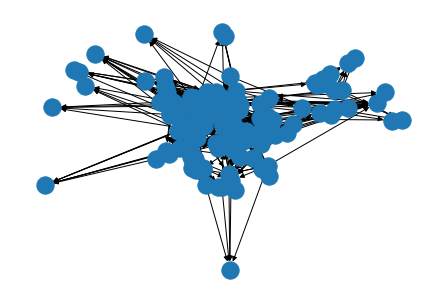

In [76]:
nx.draw(g)